# Visualization with matplotlib

## Lecture Objectives

  - Create simple graphs in Python using `matplotlib`

## Motivation

  - So far we've only been using R in class, but Python is also a very popular language for data science.
  - As we start using Python more and more, you may not always want to switch back and forth between the two.
  - In this lecture, you'll be introduced to the main plotting library in Python: `matplotlib`.

## Disclaimer

  - I personally prefer `ggplot2` to `matplotlib`.
    + I find it more flexible, more powerful, and the syntax makes more sense (to me!).
  - Therefore, when I create data visualization for a paper, I almost always use `ggplot2`.
    + E.g. Do computation in Python, save results as CSV, import in R and plot.
  - But I use `matplotlib` for quick visualization and sanity checks.

## Histograms

  - We will start where we started with ggplot: the histogram.
  - The basic function is `hist` in `matplotlib.pyplot`.
  - We will start by generating random numbers using Numpy. We will see later how to import data.

(array([  3.,  26.,  89., 173., 229., 261., 141.,  63.,  13.,   2.]),
 array([-3.24091342, -2.56709793, -1.89328243, -1.21946694, -0.54565144,
         0.12816405,  0.80197955,  1.47579505,  2.14961054,  2.82342604,
         3.49724153]),
 <BarContainer object of 10 artists>)

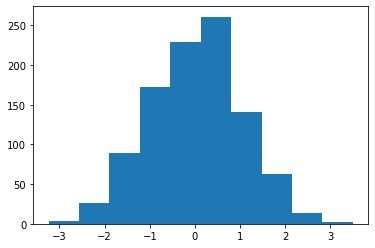

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(1000)
plt.hist(data)

The `hist` function has many parameters you can use to customize your plots.

(array([0.00445226, 0.        , 0.00890451, 0.01335677, 0.04452257,
        0.05787935, 0.08904515, 0.11130643, 0.19589932, 0.19144707,
        0.2715877 , 0.30720576, 0.32501479, 0.37398962, 0.32056253,
        0.43186896, 0.36063285, 0.36953736, 0.28494447, 0.20035158,
        0.14247224, 0.10685418, 0.10685418, 0.06678386, 0.02671354,
        0.02226129, 0.00890451, 0.00445226, 0.        , 0.00445226]),
 array([-3.24091342, -3.01630826, -2.79170309, -2.56709793, -2.34249276,
        -2.1178876 , -1.89328243, -1.66867727, -1.4440721 , -1.21946694,
        -0.99486177, -0.77025661, -0.54565144, -0.32104628, -0.09644111,
         0.12816405,  0.35276922,  0.57737439,  0.80197955,  1.02658472,
         1.25118988,  1.47579505,  1.70040021,  1.92500538,  2.14961054,
         2.37421571,  2.59882087,  2.82342604,  3.0480312 ,  3.27263637,
         3.49724153]),
 [<matplotlib.patches.Polygon at 0x7f83110c7e90>])

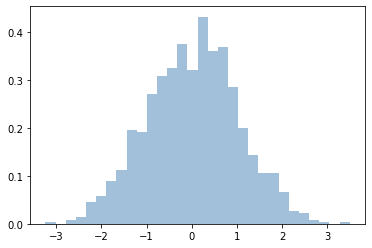

In [6]:
plt.hist(data, bins = 30, density = True, alpha = 0.5,
         histtype = 'stepfilled', color = 'steelblue')

Let's go over each and see what they do:

  - `bins`: Controls the number of bins
  - `density`: Whether we want a frequency or density histogram (look at the y-axis!)
  - `alpha`: Controls transparency (just like in ggplot2)
  - `histtype`: Type of histogram to draw. Default is `"bar"`. Type `"stepfilled"` is a lineplot (for the steps) that is filled. Try `"step"` to see what's going on.
  - `color`: Controls the colour.

### Exercise

Repeat the histogram above but using `histtype = "step"`, `alpha = 1`, and change the colour.

In [7]:
# Write your code here.




Now let's try with the `olive` dataset. I saved it as a CSV file.

In [8]:
import pandas

olive = pandas.read_csv("olive.csv")
print(olive.head())

           region          area  palmitic  palmitoleic  stearic  oleic  \
0  Southern Italy  North-Apulia     10.75         0.75     2.26  78.23   
1  Southern Italy  North-Apulia     10.88         0.73     2.24  77.09   
2  Southern Italy  North-Apulia      9.11         0.54     2.46  81.13   
3  Southern Italy  North-Apulia      9.66         0.57     2.40  79.52   
4  Southern Italy  North-Apulia     10.51         0.67     2.59  77.71   

   linoleic  linolenic  arachidic  eicosenoic  
0      6.72       0.36       0.60        0.29  
1      7.81       0.31       0.61        0.29  
2      5.49       0.31       0.63        0.29  
3      6.19       0.50       0.78        0.35  
4      6.72       0.50       0.80        0.46  


In [9]:
data_south = olive[olive["region"] == "Southern Italy"]["oleic"]
data_north = olive[olive["region"] == "Northern Italy"]["oleic"]
data_sard = olive[olive["region"] == "Sardinia"]["oleic"]

(array([ 1.,  2.,  6., 11.,  8.,  5.,  1., 16., 25., 23.]),
 array([68.82 , 69.377, 69.934, 70.491, 71.048, 71.605, 72.162, 72.719,
        73.276, 73.833, 74.39 ]),
 <BarContainer object of 10 artists>)

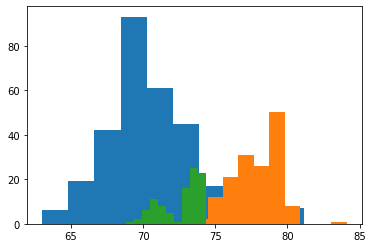

In [10]:
plt.hist(data_south)
plt.hist(data_north)
plt.hist(data_sard)

Note: These are **not** stacked histograms! We're printing each histogram on top of the next.

Now let's customize this further by adding transparency and a legend.

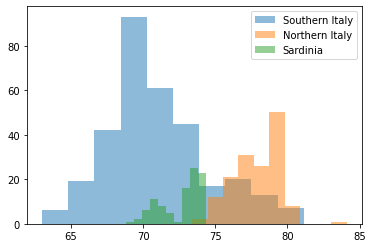

In [11]:
# Add transparency
plt.hist(data_south, alpha = 0.5, label = "Southern Italy")
plt.hist(data_north, alpha = 0.5, label = "Northern Italy")
plt.hist(data_sard, alpha = 0.5, label = "Sardinia")

# Add legend
# Only labeled parts will be added
plt.legend()

## Boxplots

Next, let's discuss boxplots.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f83121fd690>,
 'caps': [<matplotlib.lines.Line2D at 0x7f83121fded0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83121fd310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f83122227d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8312222c10>],
 'means': []}

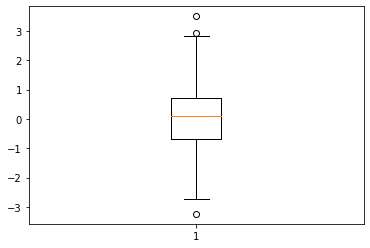

In [12]:
# Single boxplot
plt.boxplot(data)

To create multiple boxplots next to one another, we can pass a list of vectors.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f83122e6dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f83122ed690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83122e69d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f83122edf50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f83122f63d0>,
 'means': []}

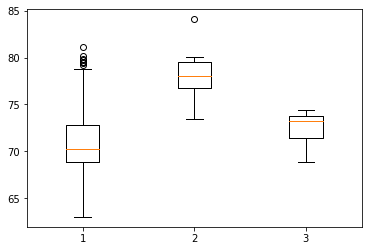

In [13]:
# List with three elements, each a vector of data
olive_box = [data_south, data_north, data_sard]
plt.boxplot(olive_box)

By default, the labels on the x-axis are simply numbers. We can change that using the `labels` argument.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f83123fb950>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8312405210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83123fb550>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8312405ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8312405f10>,
 'means': []}

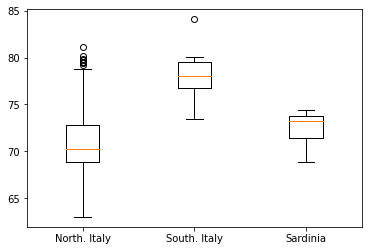

In [14]:
plt.boxplot(olive_box, 
            labels = ["North. Italy", "South. Italy", "Sardinia"])

### Exercise

One of the parameters to `boxplot` is `notch`. What does it do?

## Barplot

For bar plots, you need to specify two lists:
  - The levels of the categorical variable
  - The counts in each group (or the value we want to display)
  
Recall that in `R` the counts were computed by ggplot; here we have to pass the counts explicitly.

<BarContainer object of 5 artists>

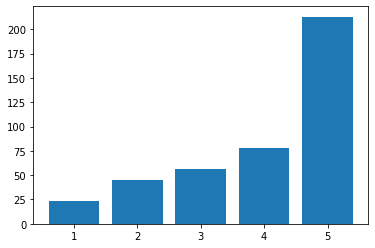

In [15]:
data = [23, 45, 56, 78, 213]
plt.bar([1,2,3,4,5], data)

<BarContainer object of 5 artists>

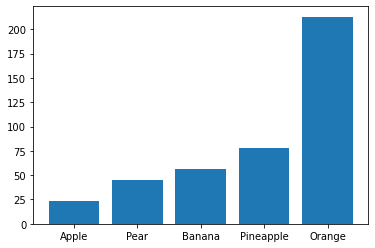

In [16]:
# Levels can also be strings
plt.bar(["Apple","Pear","Banana","Pineapple","Orange"], 
        data)

For more control, we can also create each bar separately (like we did for histograms).

<BarContainer object of 1 artists>

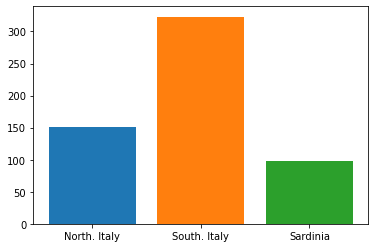

In [17]:
# Beware: the function is len() in Python
#         but length() in R!

plt.bar("North. Italy", len(data_north))
plt.bar("South. Italy", len(data_south))
plt.bar("Sardinia", len(data_sard))

You can also change the colours using one of the built in palettes (for more info: https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [18]:
# np.linspace is the equivalent of seq in R
# It outputs equidistant values between min=0 and max=1
colours = plt.cm.viridis(np.linspace(0, 1, 3))

# The output is a list of RGBA values
print(colours)

[[0.267004 0.004874 0.329415 1.      ]
 [0.127568 0.566949 0.550556 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


<BarContainer object of 1 artists>

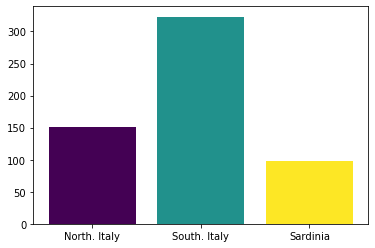

In [19]:
plt.bar("North. Italy", len(data_north), color = colours[0])
plt.bar("South. Italy", len(data_south), color = colours[1])
plt.bar("Sardinia", len(data_sard), color = colours[2])

### Exercise

Create a bar plot with percentages on the y-axis?

In [20]:
# Write your code here




## Scatter plots and line plots

Scatter plots and line plots are actually created using the same function, like in base R. First, we will look at scatter plots.

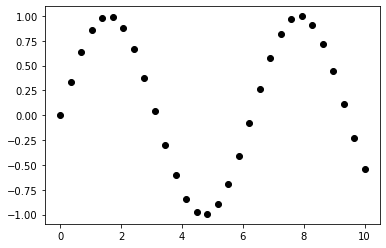

In [21]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

The third argument `"o"` controls how the points look.

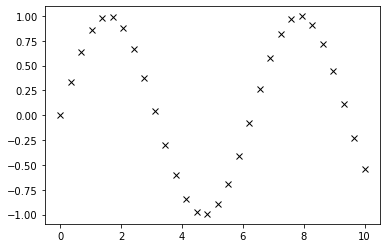

In [22]:
plt.plot(x, y, 'x', color = 'black')

If you prefer a line plot, you can simply omit the third argument altogether.

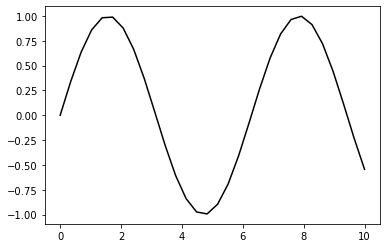

In [23]:
plt.plot(x, y, color = 'black')

You can add as many lines as you like. Here is a sample of different ways of specifying the colour.

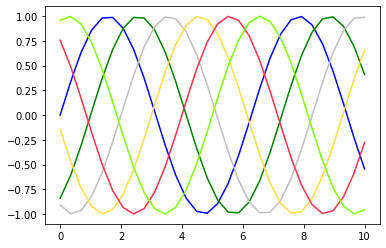

In [24]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse')  # all HTML color names supported

Finally, we can use the scatter plot on the olive dataset.

Text(0, 0.5, 'Linolenic')

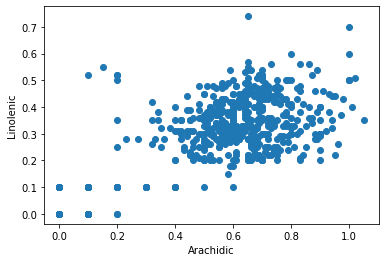

In [28]:
plt.plot(olive["arachidic"],
         olive["linolenic"], "o")

# Add axis labels
plt.xlabel("Arachidic")
plt.ylabel("Linolenic")